<a href="https://colab.research.google.com/github/nish1606/Pyramids-Computer-vision/blob/main/Pyramids_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Gaussian Pyramids***

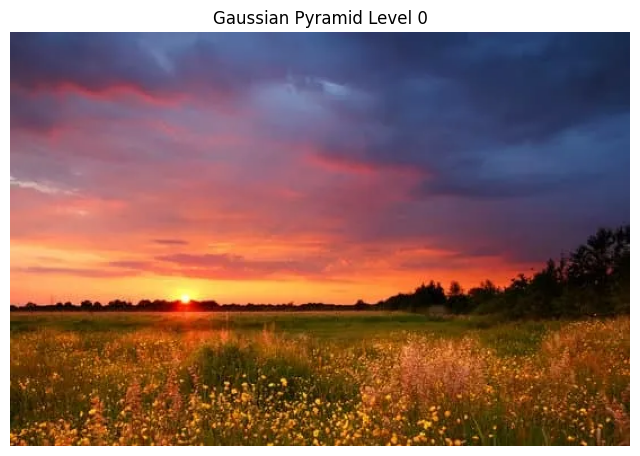

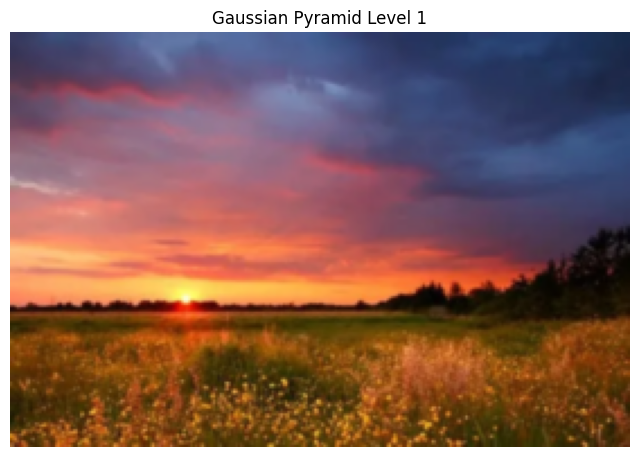

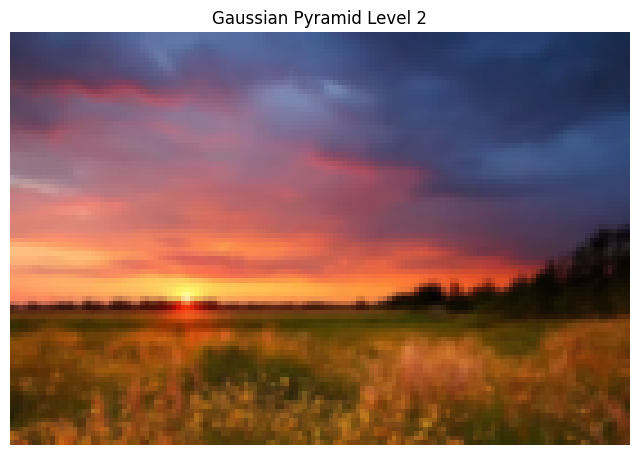

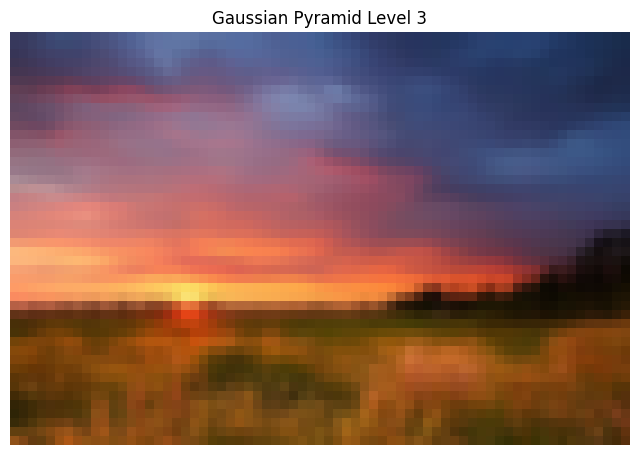

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread('/content/image.jpg')
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # 1. First, build the Gaussian Pyramid
    gaussian_pyramid = [img]
    for i in range(3):
        # Downsample the image
        img_down = cv2.pyrDown(gaussian_pyramid[-1])
        gaussian_pyramid.append(img_down)

    # Display each level of the Gaussian pyramid using matplotlib
    for i, level in enumerate(gaussian_pyramid):
        # Use matplotlib to show the image inline
        plt.figure(figsize=(8, 6))
        plt.title(f'Gaussian Pyramid Level {i}')
        # We convert BGR to RGB for correct color display with matplotlib
        plt.imshow(cv2.cvtColor(level, cv2.COLOR_BGR2RGB))
        plt.axis('off') # Hide the axes
        plt.show()


***Laplacian Pyramids***

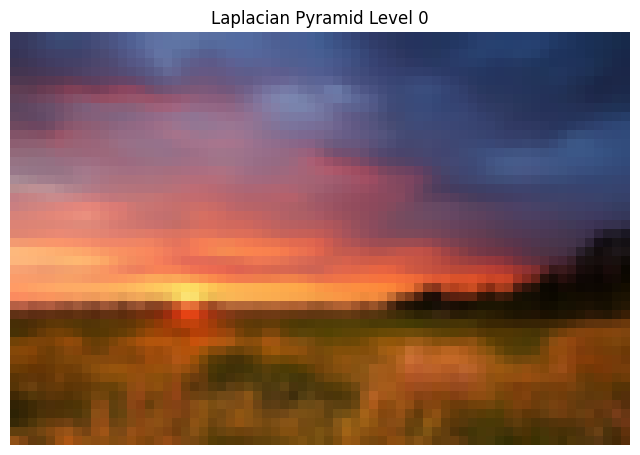

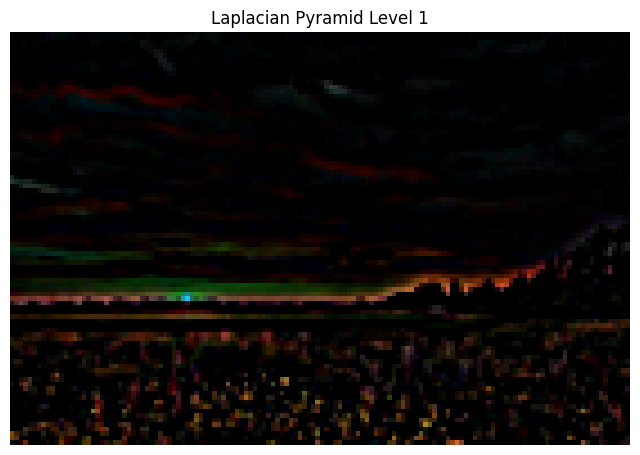

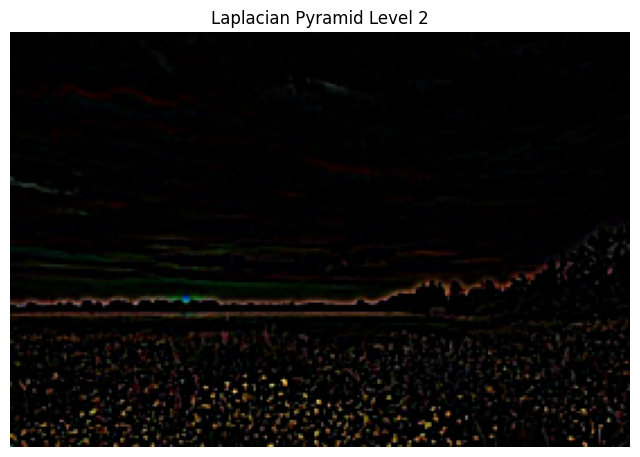

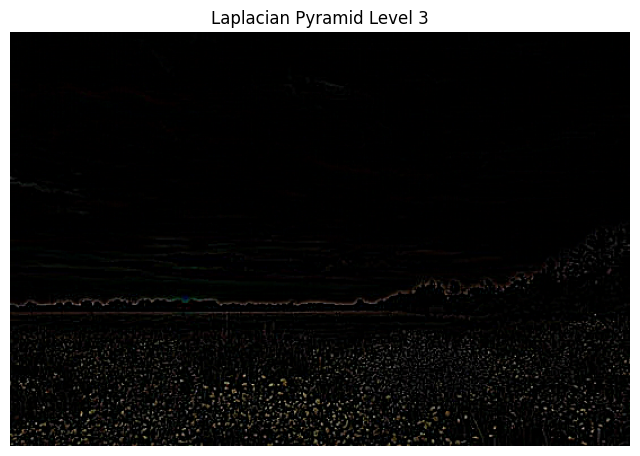

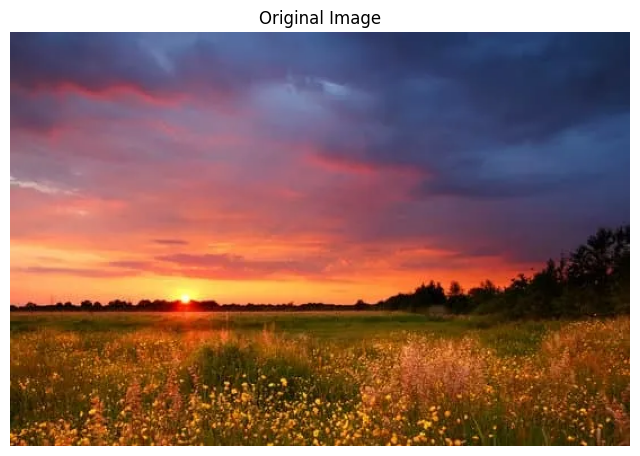

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread('/content/image.jpg')
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # 1. First, build the Gaussian Pyramid
    gaussian_pyramid = [img]
    for i in range(3):
        img_down = cv2.pyrDown(gaussian_pyramid[-1])
        gaussian_pyramid.append(img_down)

    # 2. Now, build the Laplacian Pyramid from the Gaussian Pyramid
    # The smallest Gaussian image is the top of the pyramid
    laplacian_pyramid = [gaussian_pyramid[-1]]

    for i in range(len(gaussian_pyramid) - 1, 0, -1):
        # Expand the smaller image to the size of the larger one
        size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)

        # Subtract the expanded image from the corresponding Gaussian level
        laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
        laplacian_pyramid.append(laplacian)

    # Display each level of the Laplacian pyramid using matplotlib
    for i, level in enumerate(laplacian_pyramid):
        # We need to normalize the image for proper display as it contains negative values
        laplacian_normalized = cv2.normalize(level, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        # Use matplotlib to show the image inline
        plt.figure(figsize=(8, 6))
        plt.title(f'Laplacian Pyramid Level {i}')
        # We convert BGR to RGB for correct color display with matplotlib
        plt.imshow(cv2.cvtColor(laplacian_normalized, cv2.COLOR_BGR2RGB))
        plt.axis('off') # Hide the axes
        plt.show()

    # You can also display a single image directly, for example, the original
    plt.figure(figsize=(8, 6))
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
